In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv("../Outputs/Population_for_ML.csv")
df

,Country,Year,Lat,Lng,Population,Rate
0,Afghanistan,1955,33.939110,67.709953,8892,1.760
1,Afghanistan,1960,33.939110,67.709953,9830,2.030
2,Afghanistan,1965,33.939110,67.709953,10998,2.270
3,Afghanistan,1970,33.939110,67.709953,12431,2.480
4,Afghanistan,1975,33.939110,67.709953,14133,2.600
5,Afghanistan,1980,33.939110,67.709953,15045,1.260
6,Afghanistan,1985,33.939110,67.709953,13120,-2.700
7,Afghanistan,1990,33.939110,67.709953,13569,0.670
8,Afghanistan,1995,33.939110,67.709953,19446,7.460
9,Afghanistan,2000,33.939110,67.709953,22462,2.930


In [3]:
df_world = df.loc[(df['Country']=='World') & (df['Year']<2025)].reset_index(drop=True)
df_world = df_world.drop(columns=['Country', 'Lat', 'Lng'])
df_world

,Year,Population,Rate
0,1955,2782099,1.70
1,1960,3043002,1.81
2,1965,3350426,1.94
3,1970,3712698,2.07
4,1975,4089084,1.95
5,1980,4451363,1.71
6,1985,4856463,1.76
7,1990,5288956,1.72
8,1995,5699203,1.51
9,2000,6088572,1.33


In [82]:
# Assign X (data) and y (target)

X = df_world[['Year', 'Rate']]
y = df_world["Population"].values.reshape(-1, 1)
print(X.shape, y.shape)


(14, 2) (14, 1)


In [83]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11, 2)
(3, 2)
(11, 1)
(3, 1)


In [89]:
name = []
RMSE = []
MAE = []
R_Square = []


# LinearRegression

In [90]:
# Import & Create the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

In [91]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Use model to make predictions
lr_predictions = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, lr_predictions)
r2 = round(r2_score(y_test, lr_predictions), 4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, lr_predictions))

name.append('Linear Regression')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("LINEAR REGRESSION: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

LINEAR REGRESSION: 
------------------
Root Mean Square error (RMSE ): 65508
Mean Absolute_Error (MAE ): 39260
R-square (R2 ): 0.9986


# Lasso

In [92]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
model = Lasso()
lasso = model.fit(X_train, y_train)

lasso_predictions = lasso.predict(X_test)

mse = mean_squared_error(y_test, lasso_predictions)
r2 = round(lasso.score(X_test, y_test), 4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, lasso_predictions))

name.append('Lasso')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("LASSO: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

LASSO: 
------------------
Root Mean Square error (RMSE ): 65528
Mean Absolute_Error (MAE ): 39271
R-square (R2 ): 0.9986


# Decision Tree

In [93]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model = model.fit(X_train, y_train)
dt_predictions = model.predict(X_test)

mse = mean_squared_error(y_test, dt_predictions)
r2 = round(model.score(X_test, y_test),4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, dt_predictions))

name.append('Decision Tree')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("DECISION TREE: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")
# mse = mean_squared_error(y_test, reg_predictions)
# r2 = regressor.score(y_test, reg_predictions)



DECISION TREE: 
------------------
Root Mean Square error (RMSE ): 353248
Mean Absolute_Error (MAE ): 347853
R-square (R2 ): 0.9602


# K-Nearest Neighbor (KNN)

In [94]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model = model.fit(X_train, y_train)
knn_predictions = model.predict(X_test)

mse = mean_squared_error(y_test, knn_predictions)
r2 = round(model.score(X_test, y_test), 4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, knn_predictions))

name.append('K-Nearest Neighbor')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("K-Nearest Neighbor Regressor: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

K-Nearest Neighbor Regressor: 
------------------
Root Mean Square error (RMSE ): 401073
Mean Absolute_Error (MAE ): 370920
R-square (R2 ): 0.9487


# SVM Regression

In [95]:
from sklearn.svm import SVR

model = SVR()
model = model.fit(X_train, y_train)
svr_predictions = model.predict(X_test)

mse = mean_squared_error(y_test, svr_predictions)
r2 = round(model.score(X_test, y_test),4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, svr_predictions))

name.append('SVM Regression')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("SVM Regression: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

SVM Regression: 
------------------
Root Mean Square error (RMSE ): 1812976
Mean Absolute_Error (MAE ): 1772114
R-square (R2 ): -0.0483


# Neural Networks

In [96]:
# from numpy.random import seed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow
from tensorflow import keras
from sklearn.metrics import r2_score
model = Sequential()


number_inputs = 2

model.add(Dense(3, activation='relu', input_shape=[number_inputs]))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, validation_split=0.2, epochs=30)

NN_predictions = model.predict(X_test)

mse = mean_squared_error(y_test, NN_predictions)
r2 = round(r2_score(y_test, NN_predictions), 4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, NN_predictions))

name.append('Neural Networks')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("Neural Networks: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

Epoch 1/30
1/1 [==============================] - 1s 605ms/step - loss: 28570653032448.0000 - val_loss: 26424735956992.0000
Epoch 2/30
1/1 [==============================] - 0s 62ms/step - loss: 28570629963776.0000 - val_loss: 26424717082624.0000
Epoch 3/30
1/1 [==============================] - 0s 56ms/step - loss: 28570606895104.0000 - val_loss: 26424691916800.0000
Epoch 4/30
1/1 [==============================] - 0s 54ms/step - loss: 28570583826432.0000 - val_loss: 26424668848128.0000
Epoch 5/30
1/1 [==============================] - 0s 55ms/step - loss: 28570562854912.0000 - val_loss: 26424645779456.0000
Epoch 6/30
1/1 [==============================] - 0s 67ms/step - loss: 28570541883392.0000 - val_loss: 26424626905088.0000
Epoch 7/30
1/1 [==============================] - 0s 64ms/step - loss: 28570516717568.0000 - val_loss: 26424608030720.0000
Epoch 8/30
1/1 [==============================] - 0s 76ms/step - loss: 28570495746048.0000 - val_loss: 26424582864896.0000
Epoch 9/30
1/1 

# Ridge Regression(alpha=1.0)

In [97]:
from sklearn.linear_model import Ridge

from numpy import absolute, mean, std

model = Ridge(alpha=1.0)

model = model.fit(X, y)

model = model.fit(X_train, y_train)
ridge_predictions = model.predict(X_test)

mse = mean_squared_error(y_test, ridge_predictions)
r2 = round(model.score(X_test, y_test), 4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, ridge_predictions))

name.append('Ridge Regression')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("Ridge Regression: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

Ridge Regression: 
------------------
Root Mean Square error (RMSE ): 117789
Mean Absolute_Error (MAE ): 77978
R-square (R2 ): 0.9956


# Elastic Net

In [98]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
model = ElasticNet(alpha=.01).fit(X_train, y_train)

el_predictions = model.predict(X_test)

MSE = mean_squared_error(y_test, el_predictions)
r2 = round(model.score(X_test, y_test),4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, el_predictions))

name.append('Elastic Net')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("Elastic Net: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

Elastic Net: 
------------------
Root Mean Square error (RMSE ): 117789
Mean Absolute_Error (MAE ): 50471
R-square (R2 ): 0.9979


# XG Boost Regressor

In [99]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = model.predict(X_test)

MSE = mean_squared_error(y_test, XGBpredictions)
r2 = round(model.score(X_test, y_test), 4)
rmse = int(np.sqrt(mse))
mae = int(mean_absolute_error(y_test, XGBpredictions))

name.append('XG Boost')
MAE.append(mae)
RMSE.append(rmse)
R_Square.append(r2)

print("XG Boost: ")
print("------------------")
print(f"Root Mean Square error (RMSE ): {rmse}")
print(f"Mean Absolute_Error (MAE ): {mae}")
print(f"R-square (R2 ): {r2}")

XG Boost: 
------------------
Root Mean Square error (RMSE ): 117789
Mean Absolute_Error (MAE ): 335486
R-square (R2 ): 0.9624


In [100]:
print(MAE)
print(RMSE)
print(R_Square)

[39260, 39271, 347853, 370920, 1772114, 5245758, 77978, 50471, 335486]
[65508, 65528, 353248, 401073, 1812976, 5536550, 117789, 117789, 117789]
[0.9986, 0.9986, 0.9602, 0.9487, -0.0483, -8.7765, 0.9956, 0.9979, 0.9624]


In [145]:
models_df = pd.DataFrame(list(zip(name, R_Square, RMSE, MAE)),
               columns =['Model', 'r2', 'RMSE', 'MAE']).set_index('Model').sort_values(by=['r2'], ascending=False)
models_df

,r2,RMSE,MAE
Model,,,
Linear Regression,0.9986,65508,39260
Lasso,0.9986,65528,39271
Elastic Net,0.9979,117789,50471
Ridge Regression,0.9956,117789,77978
XG Boost,0.9624,117789,335486
Decision Tree,0.9602,353248,347853
K-Nearest Neighbor,0.9487,401073,370920
SVM Regression,-0.0483,1812976,1772114
Neural Networks,-8.7765,5536550,5245758


In [146]:
models_df['r2_rank'] = models_df['r2'].rank()
models_df

,r2,RMSE,MAE,r2_rank
Model,,,,
Linear Regression,0.9986,65508,39260,8.5
Lasso,0.9986,65528,39271,8.5
Elastic Net,0.9979,117789,50471,7.0
Ridge Regression,0.9956,117789,77978,6.0
XG Boost,0.9624,117789,335486,5.0
Decision Tree,0.9602,353248,347853,4.0
K-Nearest Neighbor,0.9487,401073,370920,3.0
SVM Regression,-0.0483,1812976,1772114,2.0
Neural Networks,-8.7765,5536550,5245758,1.0


In [144]:
models_r2 = models_df[['Model', 'r2_rank']]
models_r2 = models_r2.set_index('Model')
models_r2

,r2_rank
Model,
Linear Regression,8.5
Lasso,8.5
Elastic Net,7.0
Ridge Regression,6.0
XG Boost,5.0
Decision Tree,4.0
K-Nearest Neighbor,3.0
SVM Regression,2.0
Neural Networks,1.0


<AxesSubplot:ylabel='Model'>

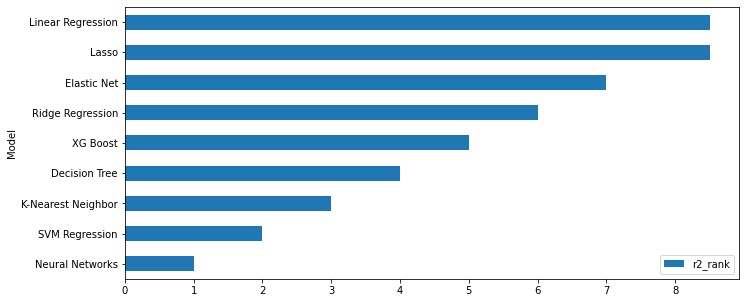

In [153]:
import matplotlib.pyplot as plt

models_r2 = models_r2.iloc[::-1]
models_r2.plot(kind='barh',figsize=(11,5))
